In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
np.random.seed(13)

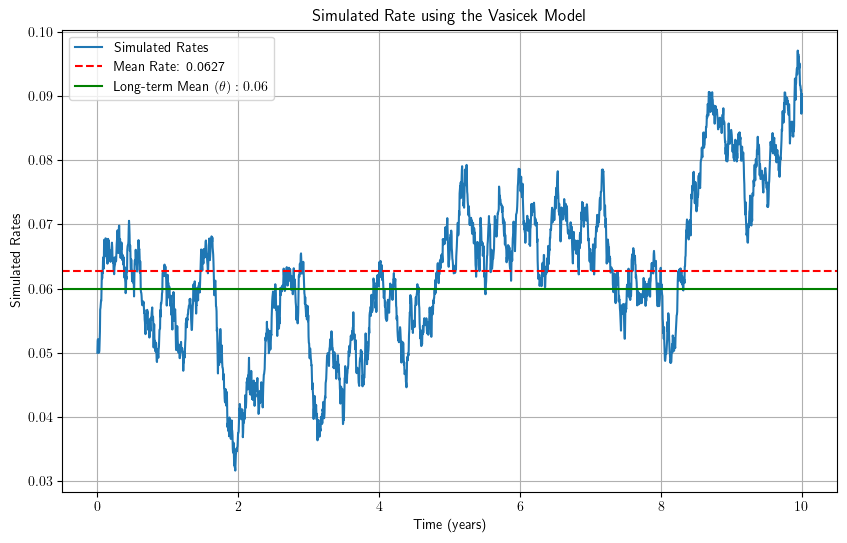

In [4]:

def simulate_vasicek(r0, a, b, sigma, T, dt):
    """
    Simulate interest rate using the Vasicek model.
    
    Parameters:
        r0 (float): Initial interest rate
        a (float): Speed of mean reversion
        b (float): Long-term mean interest rate
        sigma (float): Volatility of interest rate
        T (int): Time horizon for the simulation
        dt (float): Time step size

    Returns:
        np.array: Simulated interest rates over time
    """
    N = int(T / dt)
    t = np.linspace(0, T, N)
    rates = np.zeros(N)
    rates[0] = r0

    for i in range(1, N):
        dw = np.random.normal(0, np.sqrt(dt))
        rates[i] = rates[i-1] + a * (b - rates[i-1]) * dt + sigma * dw

    return t, rates

# Parameters for the Vasicek model
r0 = 0.05  # Initial interest rate
a = 0.5    # Speed of mean reversion
b = 0.06   # Long-term mean rate
sigma = 0.02  # Volatility
T = 10     # Total time in years
dt = 1/252  # Time step in years

# Simulate the Vasicek model
t, rates = simulate_vasicek(r0, a, b, sigma, T, dt)


# Calculate the mean of the simulated rates
mean_rates = np.mean(rates)

# Save the plot to a file
plt.figure(figsize=(10, 6))
plt.plot(t, rates, label="Simulated Rates", color ='tab:blue')
plt.axhline(y=mean_rates, color='r', linestyle='--', label=f"Mean Rate: {mean_rates:.4f}")
plt.axhline(y=b, color='g', linestyle='-', label=f"Long-term Mean $(\\theta ): {b:.2f}$")
plt.title("Simulated Rate using the Vasicek Model")
plt.xlabel("Time (years)")
plt.ylabel("Simulated Rates")
plt.legend()
plt.grid(True)

plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlot.pdf")
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlot.png")
plt.show()
plt.close()

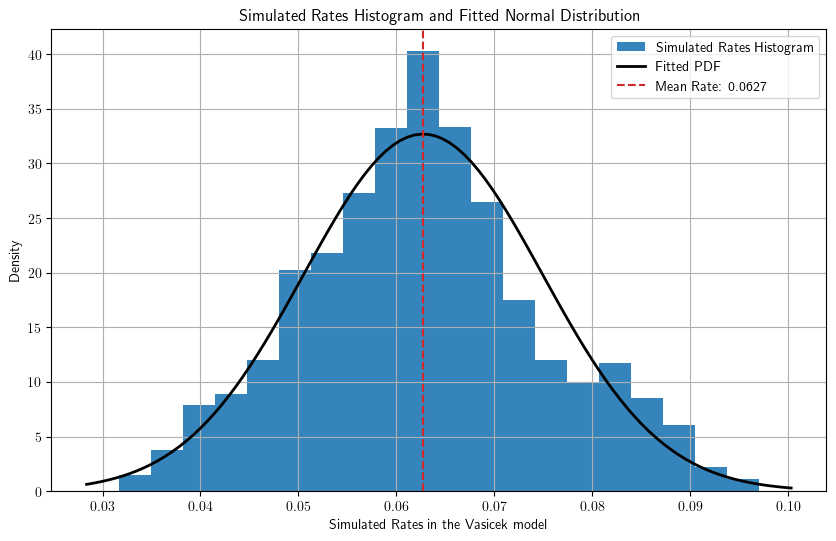

In [5]:
# Sample data
data = np.random.normal(loc=0, scale=1, size=1000)

# Fit a normal distribution to the data
mu, std = norm.fit(rates) 

# Setting up the plot with specified dimensions and grid
plt.figure(figsize=(10, 6))
plt.hist(rates, bins=20, density=True, alpha=0.9, color='tab:blue', label='Simulated Rates Histogram')

# Plot the probability density function (PDF) of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fitted PDF')

# Add a vertical line at the mean of the data
plt.axvline(np.mean(rates), color='tab:red', linestyle='--', label=f"Mean Rate: {mean_rates:.4f}")

# Adding labels, title, and grid to the plot
plt.xlabel('Simulated Rates in the Vasicek model')
plt.ylabel('Density')
plt.title('Simulated Rates Histogram and Fitted Normal Distribution')
plt.legend()  # Show legend to differentiate plotted lines
plt.grid(True)  # Enable grid

# Saving the plot to files
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/NormalDistributionPlot.pdf")  # Save as PDF
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/NormalDistributionPlot.png")  # Save as PNG

# Display the plot
plt.show()
plt.close()


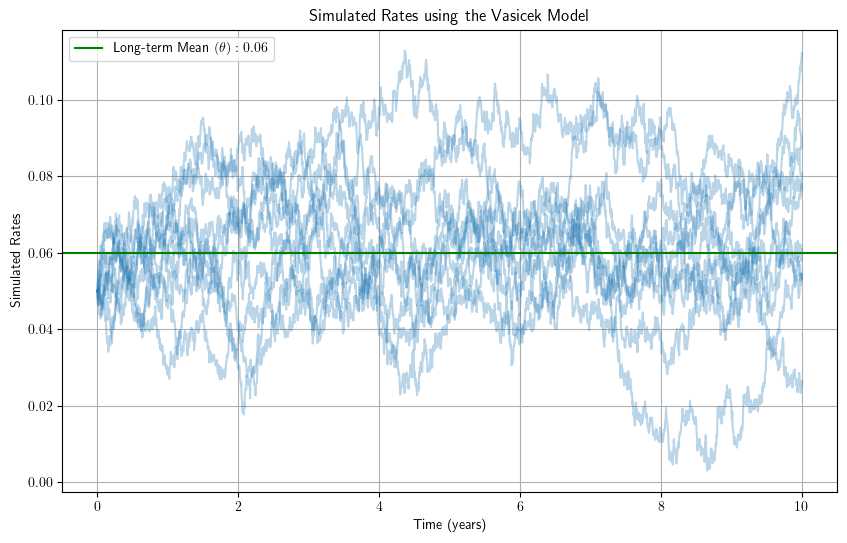

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set LaTeX rendering in plots
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Fix the random seed for reproducibility
np.random.seed(13)

def simulate_vasicek(r0, a, b, sigma, T, dt, N, t):
    """
    Simulate interest rate using the Vasicek model with given parameters.
    
    Parameters:
        r0 (float): Initial interest rate
        a (float): Speed of mean reversion
        b (float): Long-term mean interest rate
        sigma (float): Volatility of interest rate
        T (int): Time horizon for the simulation
        dt (float): Time step size
        N (int): Number of time steps
        t (np.array): Array of time points

    Returns:
        np.array: Simulated interest rates over time
    """
    rates = np.zeros(N)
    rates[0] = r0
    for i in range(1, N):
        dw = np.random.normal(0, np.sqrt(dt))
        rates[i] = rates[i-1] + a * (b - rates[i-1]) * dt + sigma * dw
    return rates

# Parameters for the Vasicek model
r0 = 0.05  # Initial interest rate
a = 0.5    # Speed of mean reversion
b = 0.06   # Long-term mean rate
sigma = 0.02  # Volatility
T = 10     # Total time in years
dt = 1/252  # Time step in years
num_simulations = 10  # Number of simulations

N = int(T / dt)  # Total number of time points
t = np.linspace(0, T, N)  # Time array

# Running the simulations
all_rates = []
for _ in range(num_simulations):
    rates = simulate_vasicek(r0, a, b, sigma, T, dt, N, t)
    all_rates.append(rates)

# Calculate the mean of the simulated rates at each time point
mean_rates = np.mean(all_rates, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
for rates in all_rates:
    plt.plot(t, rates, color='tab:blue', alpha=0.3,)  # Reduced alpha for visibility
#plt.plot(t, mean_rates, 'r', linewidth=2, label=f"Mean Rate: {mean_rates[-1]:.4f}")
plt.axhline(y=b, color='g', linestyle='-', label=f"Long-term Mean $(\\theta): {b:.2f}$")
plt.title("Simulated Rates using the Vasicek Model")
plt.xlabel("Time (years)")
plt.ylabel("Simulated Rates")
plt.legend()
plt.grid(True)

plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlotSIM.pdf")
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlotSIM.png")
plt.show()
plt.close()
